In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape

(60000, 28, 28)

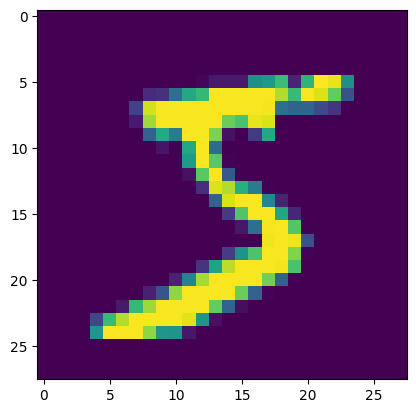

In [3]:
plt.imshow(X_train[0])

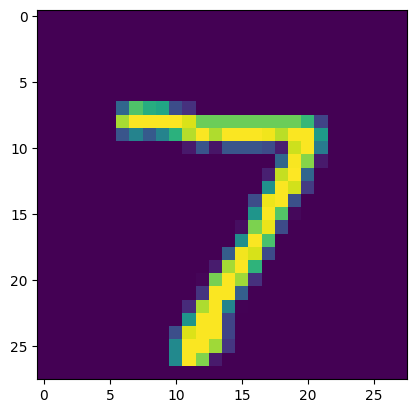

In [4]:
plt.imshow(X_test[0])

In [5]:
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)
X_train.shape

(60000, 784)

In [6]:
#rescale
X_train.max()

np.uint8(255)

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0
X_train.max()

np.float64(1.0)

In [8]:



input_layer=Input(shape=(X_train.shape[1],))
bottleneck=Dense(32,activation="relu",name="bottleneck")(input_layer)
output=Dense(X_train.shape[1],activation='sigmoid',name="output")(bottleneck)



In [9]:
autoencoder=Model(input_layer,output)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# autoencoder=Model(input_layer,bottleneck)
# autoencoder.summary()

In [11]:
# autoencoder=Model(bottleneck,output)
# autoencoder.summary()

In [12]:
autoencoder.compile(loss="mse",optimizer='adam')
history=autoencoder.fit(X_train,X_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0669
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0204
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0139
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0116
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0108


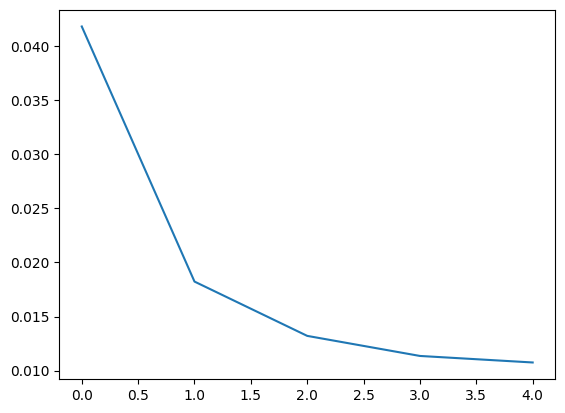

In [13]:
plt.plot(history.history['loss'])

In [16]:
# encoder model (من input → bottleneck بس)
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("bottleneck").output)

In [17]:
bottleneck_input = Input(shape=(32,))
decoder_layer = autoencoder.get_layer("output")
decoder_output = decoder_layer(bottleneck_input)

decoder = Model(inputs=bottleneck_input, outputs=decoder_output)


In [18]:
# 1- شغل الـ encoder عشان تجيب البيانات المضغوطة
encoded_data = encoder.predict(X_test, batch_size=512)

# 2- فك الضغط باستخدام الـ decoder
output_data = decoder.predict(encoded_data, batch_size=512)

print("Encoded shape:", encoded_data.shape)   # (n_samples, 32)
print("Decoded shape:", output_data.shape)    # (n_samples, 784)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Encoded shape: (10000, 32)
Decoded shape: (10000, 784)


In [19]:
output_data=output_data.reshape(output_data.shape[0],28,28)
output_data.shape

(10000, 28, 28)

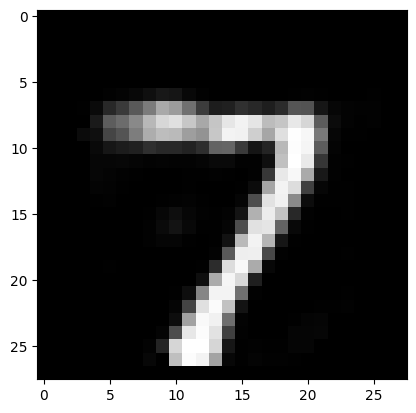

In [20]:
plt.imshow(output_data[0],cmap='gray')

In [21]:
X_test=X_test.reshape(10000,28,28)
X_test.shape

(10000, 28, 28)

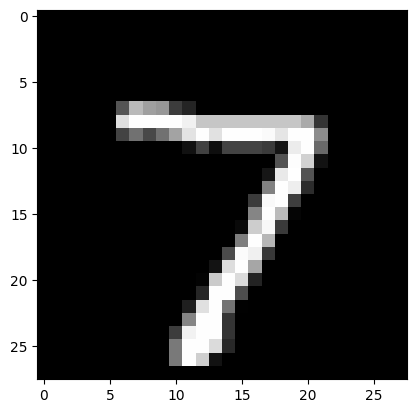

In [22]:
plt.imshow(X_test[0],cmap="gray")